### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

In [1]:
# Write your code from here
import pandas as pd
import numpy as np

# Sample sales data
# Assuming the CSV file has columns: transaction_id, product_id, quantity_sold, transaction_date, total_price

# Create a sample dataset for demonstration
data = {
    'transaction_id': [101, 102, 103, np.nan, 105],
    'product_id': [1, 2, 3, 4, np.nan],
    'quantity_sold': [3, 5, 2, 4, 1],
    'transaction_date': ['2025-05-01', '2025-05-02', '2025-05-03', '2025-05-04', '2025-05-05'],
    'total_price': [100.0, 200.0, 50.0, 80.0, np.nan]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# KPI 1: Transaction Accuracy Rate
# Valid transaction means that quantity_sold and total_price are not null or zero
valid_transactions = df.dropna(subset=['quantity_sold', 'total_price'])
transaction_accuracy_rate = (len(valid_transactions) / len(df)) * 100

# KPI 2: Sales Data Completeness Rate
# Completeness rate based on missing values in important columns
columns_to_check = ['transaction_id', 'product_id', 'quantity_sold', 'total_price']
missing_data_count = df[columns_to_check].isnull().sum().sum()
total_possible_missing = len(df) * len(columns_to_check)
sales_data_completeness_rate = ((total_possible_missing - missing_data_count) / total_possible_missing) * 100

# KPI 3: Data Freshness Rate (Assuming all transactions are within the same timeframe)
# Let's assume transactions should be recorded within 24 hours for timeliness
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['current_date'] = pd.to_datetime('2025-05-06')  # Replace with today's date or relevant comparison
df['time_diff'] = (df['current_date'] - df['transaction_date']).dt.days

# Assuming data freshness requires the transaction to be within the last 1 day
timely_transactions = df[df['time_diff'] <= 1]
data_freshness_rate = (len(timely_transactions) / len(df)) * 100

# Display Results
print(f"Transaction Accuracy Rate: {transaction_accuracy_rate:.2f}%")
print(f"Sales Data Completeness Rate: {sales_data_completeness_rate:.2f}%")
print(f"Data Freshness Rate: {data_freshness_rate:.2f}%")
# Write your code from here

Transaction Accuracy Rate: 80.00%
Sales Data Completeness Rate: 85.00%
Data Freshness Rate: 20.00%


**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

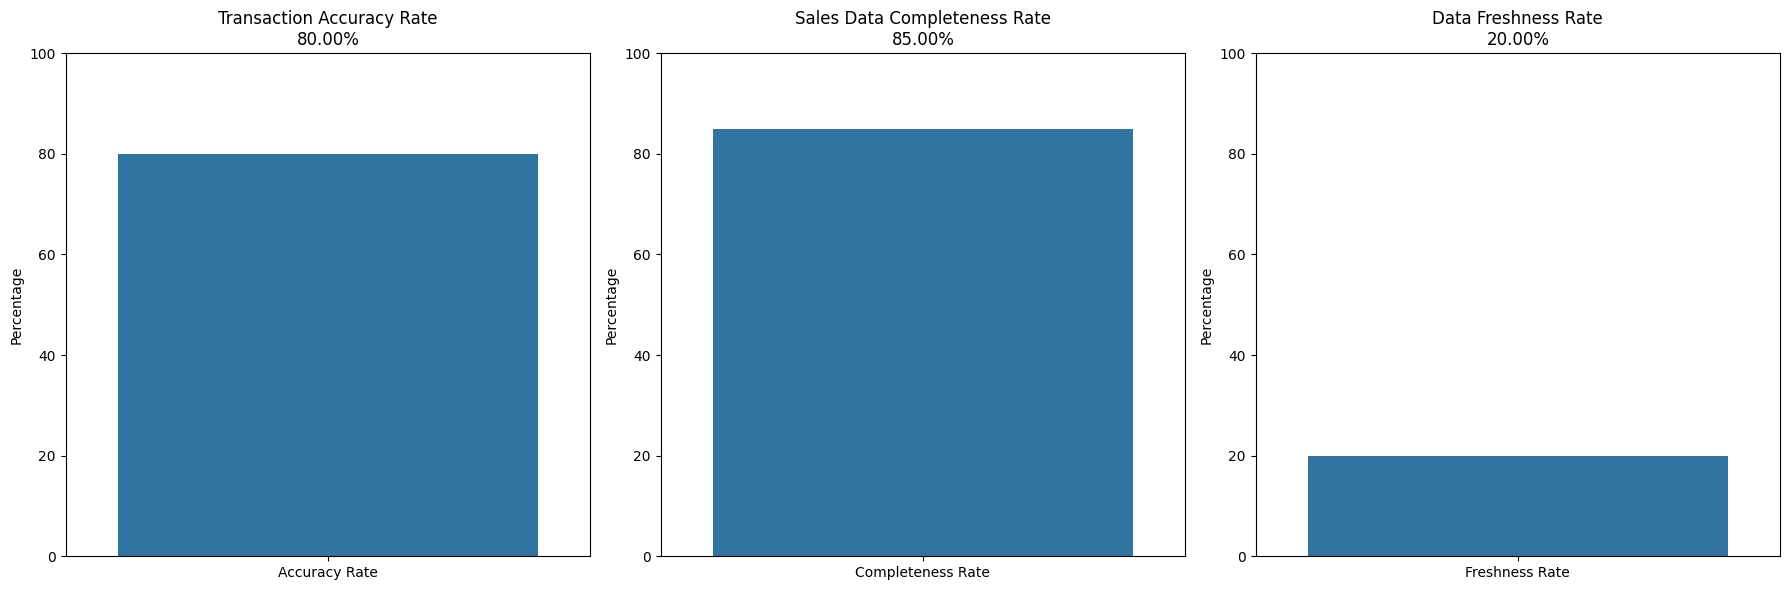

In [2]:
# Write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'transaction_id': [101, 102, 103, np.nan, 105],
    'product_id': [1, 2, 3, 4, np.nan],
    'quantity_sold': [3, 5, 2, 4, 1],
    'transaction_date': ['2025-05-01', '2025-05-02', '2025-05-03', '2025-05-04', '2025-05-05'],
    'total_price': [100.0, 200.0, 50.0, 80.0, np.nan]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# KPI 1: Transaction Accuracy Rate
valid_transactions = df.dropna(subset=['quantity_sold', 'total_price'])
transaction_accuracy_rate = (len(valid_transactions) / len(df)) * 100

# KPI 2: Sales Data Completeness Rate
columns_to_check = ['transaction_id', 'product_id', 'quantity_sold', 'total_price']
missing_data_count = df[columns_to_check].isnull().sum().sum()
total_possible_missing = len(df) * len(columns_to_check)
sales_data_completeness_rate = ((total_possible_missing - missing_data_count) / total_possible_missing) * 100

# KPI 3: Data Freshness Rate
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['current_date'] = pd.to_datetime('2025-05-06')  # Replace with today's date or relevant comparison
df['time_diff'] = (df['current_date'] - df['transaction_date']).dt.days
timely_transactions = df[df['time_diff'] <= 1]
data_freshness_rate = (len(timely_transactions) / len(df)) * 100

# Set up the figure for plotting KPIs
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot Transaction Accuracy Rate
sns.barplot(x=["Accuracy Rate"], y=[transaction_accuracy_rate], ax=ax[0])
ax[0].set_ylim(0, 100)
ax[0].set_title(f"Transaction Accuracy Rate\n{transaction_accuracy_rate:.2f}%")
ax[0].set_ylabel('Percentage')

# Plot Completeness Rate
sns.barplot(x=["Completeness Rate"], y=[sales_data_completeness_rate], ax=ax[1])
ax[1].set_ylim(0, 100)
ax[1].set_title(f"Sales Data Completeness Rate\n{sales_data_completeness_rate:.2f}%")
ax[1].set_ylabel('Percentage')

# Plot Freshness Rate
sns.barplot(x=["Freshness Rate"], y=[data_freshness_rate], ax=ax[2])
ax[2].set_ylim(0, 100)
ax[2].set_title(f"Data Freshness Rate\n{data_freshness_rate:.2f}%")
ax[2].set_ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()